In [ ]:
from tensorflow.keras.datasets import imdb

# Load the IMDb dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad the sequences to ensure all inputs have the same length
train_data = pad_sequences(train_data, maxlen=200)
test_data = pad_sequences(test_data, maxlen=200)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Build the RNN model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=200))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_data, train_labels,epochs=5,batch_size=64,validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 186ms/step - accuracy: 0.6870 - loss: 0.5570 - val_accuracy: 0.8560 - val_loss: 0.3715
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 143ms/step - accuracy: 0.8975 - loss: 0.2575 - val_accuracy: 0.8514 - val_loss: 0.3499
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 137ms/step - accuracy: 0.9304 - loss: 0.1907 - val_accuracy: 0.8706 - val_loss: 0.3497
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 137ms/step - accuracy: 0.9473 - loss: 0.1502 - val_accuracy: 0.8736 - val_loss: 0.3717
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 138ms/step - accuracy: 0.9625 - loss: 0.1064 - val_accuracy: 0.8656 - val_loss: 0.4608


In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f"Test accuracy: {test_acc}")

predictions = model.predict(test_data)


782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.8537 - loss: 0.5038
Test accuracy: 0.8529199957847595
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step


              precision    recall  f1-score   support

           0       0.85      0.86      0.85     12500
           1       0.86      0.85      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

[[10707  1793]
 [ 1884 10616]]


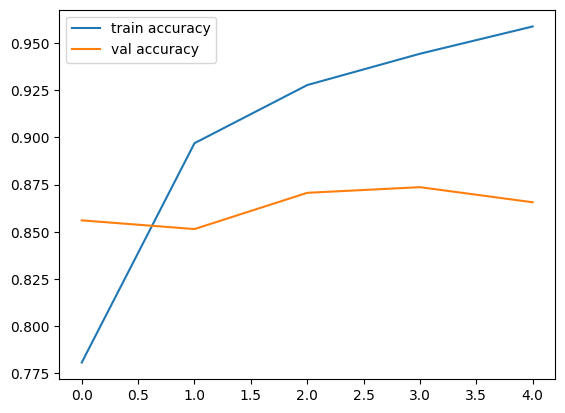

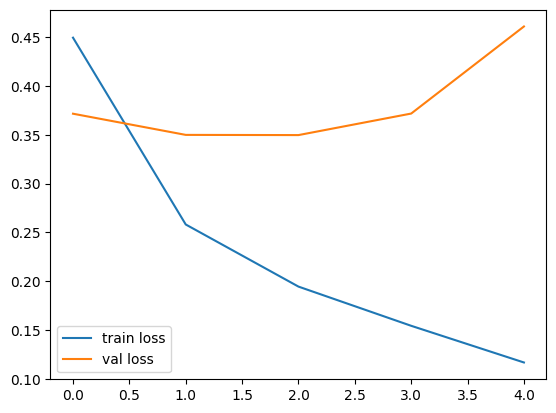

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Classification report
y_pred = (predictions > 0.5).astype("int32")
print(classification_report(test_labels, y_pred))

# Confusion matrix
cm = confusion_matrix(test_labels, y_pred)
print(cm)

# Plotting accuracy and loss curves
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
